<a href="https://colab.research.google.com/github/lizhieffe/llm_knowledge/blob/main/examples/gcp/Access_GCS_via_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab demonstrates how to programming access Google Cloud Storage (GCS) **without manual step**.

The core flow is to create a **Service Account** from GCP, and act as the **Service Account** to access GCS to avoid manual step.

# Step 1 - Get GCP Service Account credential

> **Important**:
1. this step assumes a GCP **Service Account** is already acreated.
2. Make sure the **Cloud Storage role** is assigned to the Service Account (screenshot below).

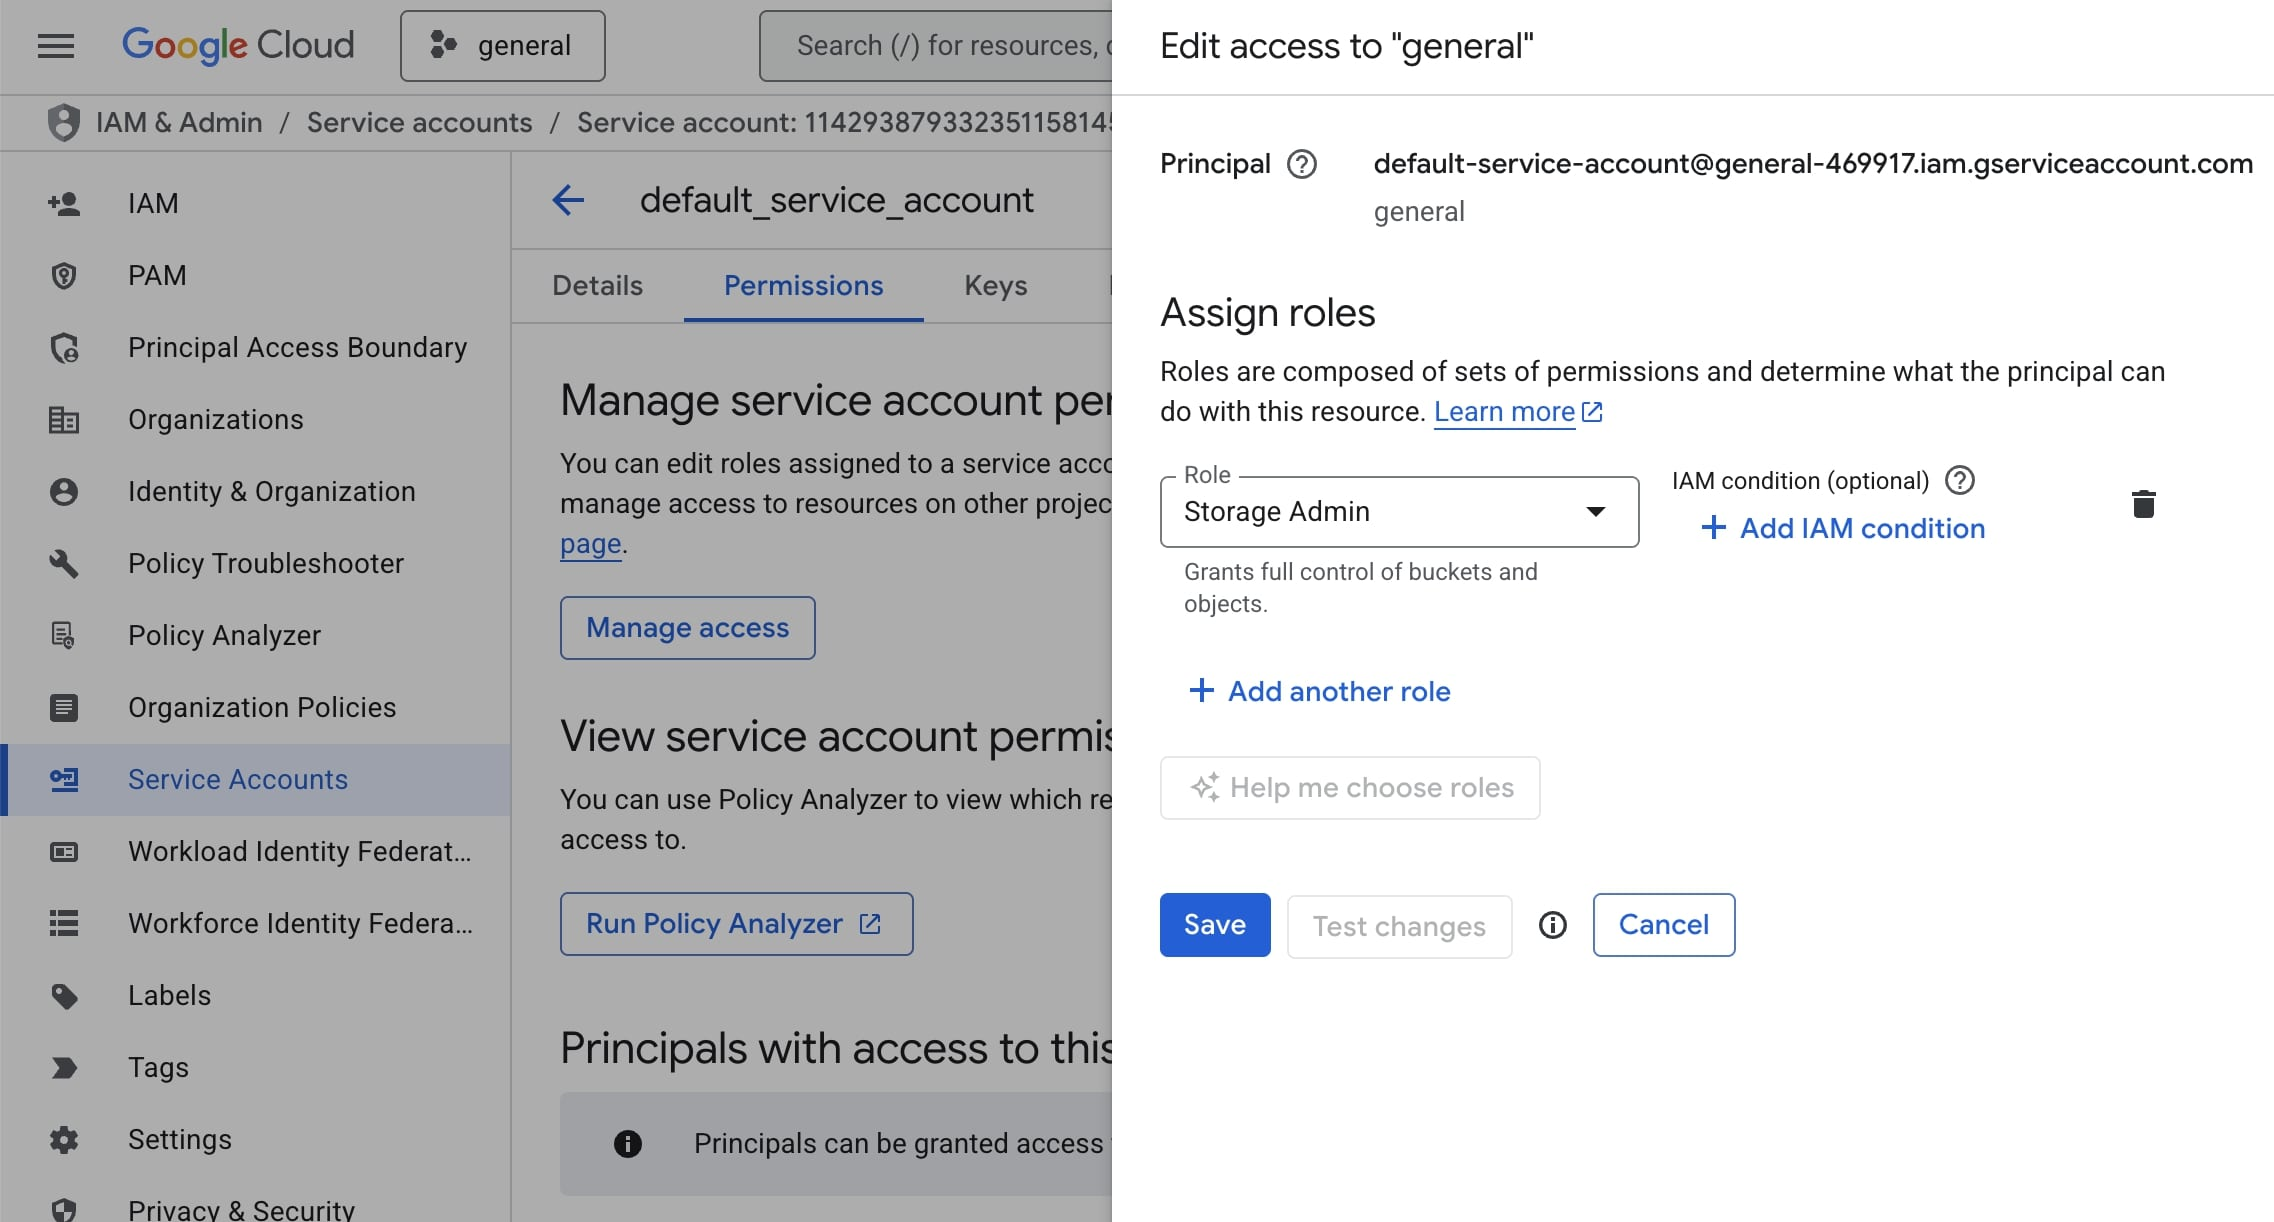

## Option 1 - read user secret

This requires to store the credential in Colab's user secrect which is a one-off step.

In [1]:
from google.colab import userdata
data_stroage_secrect = userdata.get('gdrive_data_storage_service_account')

data_storage_secret_file = "/content/data_storage_secret.json"

with open(data_storage_secret_file, 'w') as f:
  f.write(data_stroage_secrect)

## Option 2 - directly user cred file

In Colab, this requires manually update the cred file to colab everytime.

See details in https://github.com/lizhieffe/llm_knowledge/blob/main/examples/gdrive/Access_Google_Drive_via_API.ipynb

# Step 2 - Operate the GCS Bucket

In [2]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = data_storage_secret_file

In [10]:
from google.cloud import storage

# Create a client
storage_client = storage.Client()

# Access your bucket and perform operations
bucket_name = 'lizhi_general_storage'
bucket = storage_client.bucket(bucket_name)
print(f"Accessing bucket: {bucket.name}")

Accessing bucket: lizhi_general_storage


In [11]:
# @title Example - create a Blob (file)

# Create a new blob and upload the file's content.
destination_blob_name = 'test/test.txt'
blob = bucket.blob(destination_blob_name)
contents = "this is a test"
blob.upload_from_string(contents)

print(f"'{destination_blob_name}' with contents '{contents}' uploaded to bucket '{bucket_name}'.")

'test/test.txt' with contents 'this is a test' uploaded to bucket 'lizhi_general_storage'.


In [12]:
# @title Example - List blobs in the bucket

blobs = bucket.list_blobs()
for blob in blobs:
    print(blob.name)

neurips_2025_google_code_golf_championship/
test/
test/test.txt


In [14]:
# @title Example - Read a blob

file_contents = blob.download_as_string().decode('utf-8')

source_blob_name = destination_blob_name
print(f"Contents of '{source_blob_name}':")
print(file_contents)

Contents of 'test/test.txt':
this is a test
